In [2]:
# Declaración de librerías
import nltk
import numpy
import tensorflow
import random
import json

In [3]:
# Lectura de formatos .json para entrenar cada modelo y asignación
# de información correspondiente
with open('Intenciones_NivelI.json', encoding='utf-8') as file:
    data_NivelI = json.load(file)
    
with open('Intenciones_NivelIIA.json', encoding='utf-8') as file:
    data_NivelIIA = json.load(file)
    
with open('Intenciones_NivelIIB.json', encoding='utf-8') as file:
    data_NivelIIB = json.load(file)

In [4]:
# Creación de diccionarios con los nombres de las clases y textos
# presentes en cada uno de los archivos
NI = dict()
NIIA = dict()
NIIB = dict()

for info in data_NivelI['intents']:
    NI.setdefault(info['tag'], info['patterns'])

for info in data_NivelIIA['intents']:
    NIIA.setdefault(info['tag'], info['patterns'])
    
for info in data_NivelIIB['intents']:
    NIIB.setdefault(info['tag'], info['patterns'])
        
print(NI)
print(NIIA)
print(NIIB)

{'Reservar_Habitacion': ['Quiero hacer una reserva', 'Quiero reservar una habitación', 'Me gustaría reservar una habitación', '¿Puedo reservar una habitación?', 'Por favor reserva una habitación', 'Quiero reservar un cuarto', 'Me gustaría reservar un cuarto', 'Por favor reserva un cuarto', '¿Puedo reservar un cuarto?', 'Apartar un cuarto', 'Apartar una habitación'], 'Servicio_hotel': ['Quiero apartar la alberca', 'Quiero apartar el gimnasio', 'Quiero que vengan a limpiar la habitación', 'Quiero que traigan más toallas', 'Ayúdenme a bajar mis maletas']}
{'Tipo_Habitacion': ['Quisiera una habitación estándar', 'Prefiero una suite', 'Me gustaría reservar una habitación doble', 'Necesito una habitación familiar', 'Estoy buscando una habitación deluxe', 'Quiero una habitación con dos camas', '¿Qué tipos de habitaciones ofrecen?', 'Busco una habitación económica', 'Quiero un cuarto estándar', 'Me gustaría reservar un cuarto doble', 'Necesito un cuarto familiar', 'Quiero un cuarto con dos cam

In [5]:
# Generamos los vectores de respuestas para cada nivel contextual
# (Cada clase tiene una salida numérica asociada)
# (Las salidas empiezan en 0 para cada clase inicial de cada modelo)
Y_NI = list()
Y_NIIA = list()
Y_NIIB = list()

for clase, lista_textos in NI.items():
    for text in lista_textos:
        Y_NI.append(list(NI.keys()).index(clase))
        
for clase, lista_textos in NIIA.items():
    for text in lista_textos:
        Y_NIIA.append(list(NIIA.keys()).index(clase))
        
for clase, lista_textos in NIIB.items():
    for text in lista_textos:
        Y_NIIB.append(list(NIIB.keys()).index(clase))
    
print("Vector de salidas Y para N1:")
print(Y_NI)
print("Vector de salidas Y para N2A:")
print(Y_NIIA)
print("Vector de salidas Y para N2B:")
print(Y_NIIB)

Vector de salidas Y para N1:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
Vector de salidas Y para N2A:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Vector de salidas Y para N2B:
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]


In [6]:
# Importamos librerías para el filtrado de StopWords y tokenicación
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
import re

stop_words = set(stopwords.words('spanish'))

In [7]:
# Para cada enunciado quitamos las StopWords
# También quitamos los acentos y filtramos signos de puntuación
# lo hacemos mediante un metodo
def Quitar_Stopwords(Textos):
    X = list()
    for sen in Textos:
        sentence = sen
        # Filtrado de stopword
        for stopword in stop_words:
            sentence = sentence.replace(" " + stopword + " ", " ")
        sentence = sentence.replace("á", "a")
        sentence = sentence.replace("é", "e")
        sentence = sentence.replace("í", "i")
        sentence = sentence.replace("ó", "o")
        sentence = sentence.replace("ú", "u")

        # Remover espacios múltiples
        sentence = re.sub(r'\s+', ' ', sentence)
        # Convertir todo a minúsculas
        sentence = sentence.lower()
        # Filtrado de signos de puntuación
        tokenizer = RegexpTokenizer(r'\w+')
        # Tokenización del resultado
        result = tokenizer.tokenize(sentence)
        # Agregar al arreglo los textos "destokenizados" (Como texto nuevamente)
        X.append(TreebankWordDetokenizer().detokenize(result))
    return X

In [8]:
# Obtenemos el vector de entradas (Textos limpios de StopWords)
# para cada uno de los modelos que vamos a generar
Textos_NI = list()
for Lista in NI.values():
    for Texto in Lista:
        Textos_NI.append(Texto)
        
X_NI = Quitar_Stopwords(Textos_NI)

Textos_NIIA = list()
for Lista in NIIA.values():
    for Texto in Lista:
        Textos_NIIA.append(Texto)
        
X_NIIA = Quitar_Stopwords(Textos_NIIA)

Textos_NIIB = list()
for Lista in NIIB.values():
    for Texto in Lista:
        Textos_NIIB.append(Texto)
        
X_NIIB = Quitar_Stopwords(Textos_NIIB)

In [9]:
# Imprimimos la lista de los enunciados que resultan
print(X_NI)
print(X_NIIA)
print(X_NIIB)

['quiero hacer reserva', 'quiero reservar habitacion', 'me gustaria reservar habitacion', 'puedo reservar habitacion', 'por favor reserva habitacion', 'quiero reservar cuarto', 'me gustaria reservar cuarto', 'por favor reserva cuarto', 'puedo reservar cuarto', 'apartar cuarto', 'apartar habitacion', 'quiero apartar alberca', 'quiero apartar gimnasio', 'quiero vengan limpiar habitacion', 'quiero traigan toallas', 'ayudenme bajar maletas']
['quisiera habitacion estandar', 'prefiero suite', 'me gustaria reservar habitacion doble', 'necesito habitacion familiar', 'estoy buscando habitacion deluxe', 'quiero habitacion dos camas', 'que tipos habitaciones ofrecen', 'busco habitacion economica', 'quiero cuarto estandar', 'me gustaria reservar cuarto doble', 'necesito cuarto familiar', 'quiero cuarto dos camas', 'que tipos cuartos ofrecen', 'quiero cuarto vista mar', 'busco cuarto economico', 'quiero hoy', 'para llegar mañana', 'para llegar pasado mañana', 'quiero llegar lunes', 'quiero llegar 

In [10]:
# Importamos la librería para generar la matriz de entrada de textos
# (El pad_sequence)
from keras_preprocessing.sequence import pad_sequences

# Cantidad de palabras máximas por ejemplo
# (Las más utilizadas)
maxlen = 5

# Preparamos la capa de embeddingsn(Predefinimos una cantidad de
# 5000 palabras consideradas como tokens
tokenizer_NI = Tokenizer(num_words=5000)
tokenizer_NIIA = Tokenizer(num_words=5000)
tokenizer_NIIB = Tokenizer(num_words=5000)

# Transforma cada texto en una secuencia de valores enteros para cada modelo que haremos
tokenizer_NI.fit_on_texts(X_NI)
X_NI_Tok = tokenizer_NI.texts_to_sequences(X_NI)
tokenizer_NIIA.fit_on_texts(X_NIIA)
X_NIIA_Tok = tokenizer_NIIA.texts_to_sequences(X_NIIA)
tokenizer_NIIB.fit_on_texts(X_NIIB)
X_NIIB_Tok = tokenizer_NIIB.texts_to_sequences(X_NIIB)

# Especificamos la matriz (Con padding hasta maxlen)
X_NI_train = pad_sequences(X_NI_Tok, padding='post', maxlen=maxlen)
X_NIIA_train = pad_sequences(X_NIIA_Tok, padding='post', maxlen=maxlen)
X_NIIB_train = pad_sequences(X_NIIB_Tok, padding='post', maxlen=maxlen)


In [11]:
print("Matriz de entrada para NI:")
print(X_NI_train)

Matriz de entrada para NI:
[[ 1 12  6  0  0]
 [ 1  2  3  0  0]
 [ 7  8  2  3  0]
 [ 9  2  3  0  0]
 [10 11  6  3  0]
 [ 1  2  4  0  0]
 [ 7  8  2  4  0]
 [10 11  6  4  0]
 [ 9  2  4  0  0]
 [ 5  4  0  0  0]
 [ 5  3  0  0  0]
 [ 1  5 13  0  0]
 [ 1  5 14  0  0]
 [ 1 15 16  3  0]
 [ 1 17 18  0  0]
 [19 20 21  0  0]]


In [12]:
print("Matriz de entrada para NIIA:")
print(X_NIIA_train)

Matriz de entrada para NIIA:
[[41  5 14  0  0]
 [42 43  0  0  0]
 [15 16 17  5 18]
 [19  5 20  0  0]
 [44 45  5 46  0]
 [ 1  5 11 21  0]
 [22 23 47 24  0]
 [25  5 48  0  0]
 [ 1  6 14  0  0]
 [15 16 17  6 18]
 [19  6 20  0  0]
 [ 1  6 11 21  0]
 [22 23 49 24  0]
 [ 1  6 50 51  0]
 [25  6 52  0  0]
 [ 1 53  0  0  0]
 [ 7  4 12  0  0]
 [ 7  4 26 12  0]
 [ 1  4 27  0  0]
 [ 1  4 28  0  0]
 [ 1  4 29  0  0]
 [ 1  4 30  0  0]
 [ 1  4 31  0  0]
 [ 1  4 32  0  0]
 [ 1  4 33  0  0]
 [ 7  3 12  0  0]
 [ 7  3 26 12  0]
 [ 7  3 34 54  0]
 [ 7  3 34 55  0]
 [ 1  3 27  0  0]
 [ 1  3 28  0  0]
 [ 1  3 29  0  0]
 [ 1  3 30  0  0]
 [ 1  3 31  0  0]
 [ 1  3 32  0  0]
 [ 1  3 33  0  0]
 [13 35  0  0  0]
 [13 35  0  0  0]
 [56 13  0  0  0]
 [ 8 36  2  0  0]
 [ 8 37  2  0  0]
 [ 8 38  2  0  0]
 [ 9 10 36  2  0]
 [ 9 10 37  2  0]
 [ 9 10 38  2  0]
 [ 8 11  2  0  0]
 [ 8 39  2  0  0]
 [ 8 40  2  0  0]
 [ 9 10 11  2  0]
 [ 9 10 39  2  0]
 [ 9 10 40  2  0]]


In [13]:
print("Matriz de entrada para NIIB:")
print(X_NIIB_train)

Matriz de entrada para NIIB:
[[ 3  0  0  0  0]
 [ 4  3  0  0  0]
 [ 8 20  3 14  0]
 [15 21  3  0  0]
 [ 4  1 16 14 22]
 [10  1 16 23  0]
 [ 5  4  3 24  7]
 [11  5 25  7  3]
 [ 6  0  0  0  0]
 [ 4  1  6  0  0]
 [ 5  4  1 17  7]
 [26 27 18 17 28]
 [29  1 18  6  0]
 [ 4  6  5  0  0]
 [19 12  6  0  0]
 [ 8 13  7  6  0]
 [19  2  0  0  0]
 [30  2  9  5  0]
 [31 12  2  9  0]
 [10  1  2  0  0]
 [ 1 32 33 34 35]
 [36 12  2  9 37]
 [ 8 13 38 39  2]
 [13  7  2  9  5]]


In [14]:
# Declaración de librerías para manejo de arreglos (Numpy)
from numpy import asarray
from numpy import zeros

# Lectura del archivo de embeddings
embeddings_dictionary = dict()
Embeddings_file = open('/Users/mascenci/Desktop/Chatbots/Word2Vect_Spanish.txt', encoding="utf8")

# Extraemos las características del archivo de embeddings
# y las agregamos a un diccionario (Cada elemento es un vextor)
for linea in Embeddings_file:
    caracts = linea.split()
    palabra = caracts[0]
    vector = asarray(caracts[1:], dtype='float32')
    embeddings_dictionary [palabra] = vector
Embeddings_file.close()

In [15]:
# Asignamos los embeddings correspondientes a cada matriz 
# con la que se entrenarán los modelos por medio de un método
def Asignar_Embeddings(tokenizer, vocab_size):
    # Generamos la matriz de embeddings (Con 300 Características)
    embedding_matrix = zeros((vocab_size, 300))
    for word, index in tokenizer.word_index.items():
        # Extraemos el vector de embedding para cada palabra
        embedding_vector = embeddings_dictionary.get(word)
        # Si la palbra si existía en el vocabulario
        # agregamos su vector de embeddings en la matriz
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector
    return embedding_matrix

In [16]:
# Obtenemos las matrices de Embeddings para cada modelo
# Y también el tamaño del vocabulario para cada uno
vocab_size_NI = len(tokenizer_NI.word_index) + 1
embedding_matrix_NI = Asignar_Embeddings(tokenizer_NI, vocab_size_NI)

vocab_size_NIIA = len(tokenizer_NIIA.word_index) + 1
embedding_matrix_NIIA = Asignar_Embeddings(tokenizer_NIIA, vocab_size_NIIA)

vocab_size_NIIB = len(tokenizer_NIIB.word_index) + 1
embedding_matrix_NIIB = Asignar_Embeddings(tokenizer_NIIB, vocab_size_NIIB)

In [17]:
# Declaración de modelo Secuencial que usaremos para todos los casos
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import LSTM
from keras.layers import Embedding

In [18]:
# Definición del método para tener la arquitectura de los modelos para cada nivel contextual
def Definir_Modelos(vocab_size, embedding_matrix, X_train, labels):
    # Declaración de las capas del modelo LSTM
    model = Sequential()
    embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=X_train.shape[1] , trainable=False)
    model.add(embedding_layer)
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(len(labels), activation='softmax'))

    # Compilación del modelo
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())

    print("\nPalabras en el vocabulario:")
    print(vocab_size)
    return model

In [19]:
# Generamos la arquitectura para el modelo de NI
model_NI = Definir_Modelos(vocab_size_NI, embedding_matrix_NI, X_NI_train, NI.keys())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 300)            6600      
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 167,202
Trainable params: 160,602
Non-trainable params: 6,600
_________________________________________________________________
None

Palabras en el vocabulario:
22


In [20]:
# Generamos la arquitectura para el modelo de NIIA
model_NIIA = Definir_Modelos(vocab_size_NIIA, embedding_matrix_NIIA, X_NIIA_train, NIIA.keys())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 5, 300)            17100     
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense_1 (Dense)             (None, 4)                 404       
                                                                 
Total params: 177,904
Trainable params: 160,804
Non-trainable params: 17,100
_________________________________________________________________
None

Palabras en el vocabulario:
57


In [21]:
# Generamos la arquitectura para el modelo de NIIB
model_NIIB = Definir_Modelos(vocab_size_NIIB, embedding_matrix_NIIB, X_NIIB_train, NIIB.keys())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 5, 300)            12300     
                                                                 
 lstm_2 (LSTM)               (None, 100)               160400    
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 173,003
Trainable params: 160,703
Non-trainable params: 12,300
_________________________________________________________________
None

Palabras en el vocabulario:
41


In [22]:
# Declaramos el método para entrenar cada modelo
from keras.utils.np_utils import to_categorical 

def Entrenar_Modelos(X_train, Y, model, labels):
    # Declaramos librería para convertir la salida en un vector 
    # de X elementos con activación en la columna correspondiente
    # a su categoría
    train_labels = to_categorical(Y, num_classes=len(labels))
    print('Matriz de salidas')
    print(train_labels)

    # Ajuste de los datos de entrenamiento al modelo creado
    history = model.fit(X_train, train_labels, epochs=30, batch_size=1, verbose=1)

    # Cálculo de los procentajes de Eficiencia y pérdida 
    score = model.evaluate(X_train, train_labels, verbose=1)
    print("\nTest Loss:", score[0])
    print("Test Accuracy:", score[1])
    return history

In [23]:
# Entrenamos el modelo del nivel NI y obtenemos el historial de las épocas para realizar su gráfica
history_NI = Entrenar_Modelos(X_NI_train, Y_NI, model_NI, NI.keys())

Matriz de salidas
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
Epoch 1/30


2023-11-03 18:42:01.740422: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


16/16 [==============================] - 1s 2ms/step - loss: 0.7095 - accuracy: 0.4375
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6173 - accuracy: 0.6875
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.4908 - accuracy: 0.6875
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.3514 - accuracy: 0.6875
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.1644 - accuracy: 1.0000
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.1301 - accuracy: 0.9375
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0894 - accuracy: 0.9375
Epoch 8/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 1.0000
Epoch 9/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 1.0000
Epoch 10/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 1.0000
Epoch 11/30
16/16 [===========

In [24]:
# Entrenamos el modelo del nivel NIIA y obtenemos el historial de las épocas para realizar su gráfica
history_NIIA = Entrenar_Modelos(X_NIIA_train, Y_NIIA, model_NIIA, NIIA.keys())

Matriz de salidas
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
Epoch 1/30
51/51 [==============================] - 1s 2ms/step - loss: 1.3321 - accuracy: 0.4510
Epoch 2/30
51/51 [==============================] - 0s 3ms/step - loss: 0.8662 - accuracy: 0.6667
Epoch 3/30
51/51 [==

In [25]:
# Entrenamos el modelo del nivel NIIB y obtenemos el historial de las épocas para realizar su gráfica
history_NIIB = Entrenar_Modelos(X_NIIB_train, Y_NIIB, model_NIIB, NIIB.keys())

Matriz de salidas
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
Epoch 1/30
24/24 [==============================] - 1s 2ms/step - loss: 1.0983 - accuracy: 0.2917 
Epoch 2/30
24/24 [==============================] - 0s 3ms/step - loss: 1.0224 - accuracy: 0.8333
Epoch 3/30
24/24 [==============================] - 0s 3ms/step - loss: 0.9365 - accuracy: 0.8333
Epoch 4/30
24/24 [==============================] - 0s 3ms/step - loss: 0.7359 - accuracy: 0.9167
Epoch 5/30
24/24 [==============================] - 0s 3ms/step - loss: 0.5188 - accuracy: 0.8750
Epoch 6/30
24/24 [==============================] - 0s 3ms/step - loss: 0.3477 - accuracy: 0.8750
Epoch 7/30
24/24 [==============================] - 0s 3ms/step - loss: 0.1794 - accuracy: 1.0000
Epoch 

In [26]:
# Método para hacer la gráfica de cada modelo
# época a época para ver su evolución
import matplotlib.pyplot as plt

def Grafica_Modelo(history):
    # Parámetros de ploteo para la gráfica
    plt.figure(figsize=(12,5))
    plt.ylim(-0.1, 1.1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Acc','Loss'])
    plt.show()

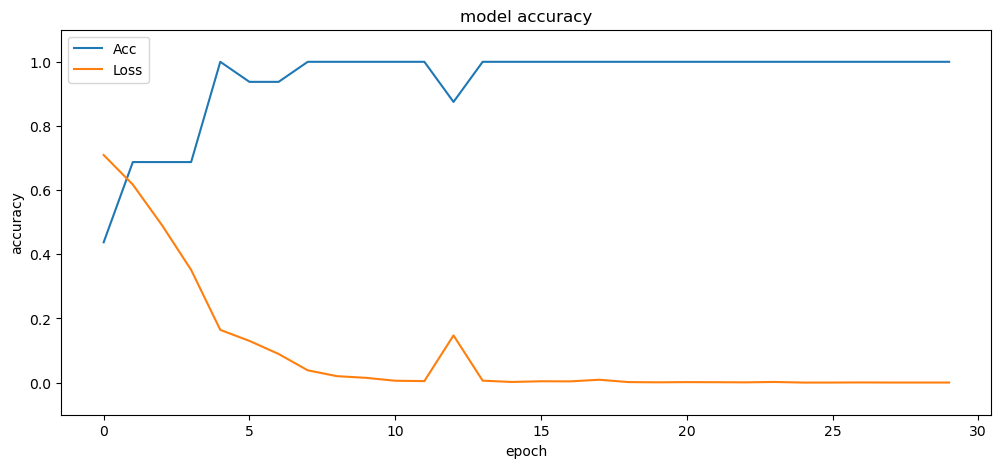

In [27]:
# Graficar el modelo NI
Grafica_Modelo(history_NI)

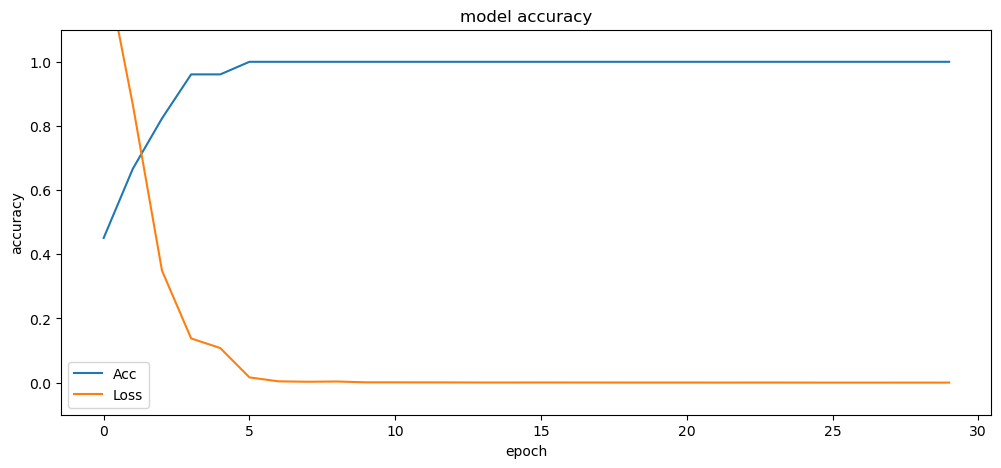

In [28]:
# Graficar el modelo NIIA
Grafica_Modelo(history_NIIA)

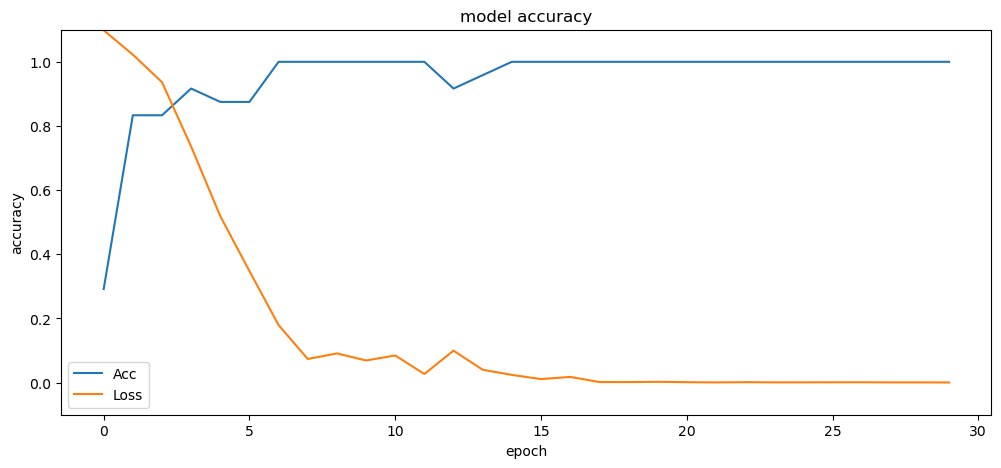

In [29]:
# Graficar el modelo NIIB
Grafica_Modelo(history_NIIB)

# Programación del Árbol conversacional

In [30]:
# El árbol conversacional debe de estar en un estado específico
# iniciar en el nivel contextual 1, e ir avanzando conforme a
# las decisiones que toma el usuario, como si fuera una máquina 
# de estados

def instancer(inp, model, tags):
    inp = inp.lower().replace("á", "a").replace("é", "e").replace("í", "i").replace("ó", "o")
    inp = inp.replace("ú", "u").replace("¿", "").replace("?", "")
    txt = [inp]
    seq = tokenizer_NI.texts_to_sequences(txt)
    padded = pad_sequences(seq, maxlen=maxlen)
    results = model.predict(padded)
    results_index = numpy.argmax(results)
    tag = list(tags.keys())[results_index]
    maxscore = numpy.max(results)
    return tag, maxscore

In [31]:
# Función del Nivel contextual 1:
def Activar_NI():
    # Pregunta inicial cuando se ingresa en el nivel contextual NI
    print("\nChatBot: ¿En qué puedo ayudarte?\n")    
    
    while True:
        inp = input("     Tú: ")
        tag, maxscore = instancer(inp, model_NI, NI)
        
        if maxscore > 0.8 or inp == 'salir':
            break
        else:
            print("\nChatBot: Lo siento, pero no entendí tu petición, ¿Podrías decirlo de otra forma?\n")
    
    if inp == 'salir':
        print("\nChatBot: Hasta luego, fue un gusto hablar contigo\n")
        return 'salir'
    
    if tag == 'Reservar_Habitacion':
        if inp.count('Tipo_Habitacion') > 0:
            return 'NIIA1'
        elif inp.count('Fecha_entrada') > 0:
            return 'NIIA2'
        elif inp.count('Fecha_salida') > 0:
            return 'NIIA3'
        elif inp.count("Num_huespedes") > 0:
            return 'NIIA4'
        else:
            return 'NIIA'
    
    # if tag == 'Reproducir_Musica':
    #     if inp.count('youtube') > 0:
    #         return 'NIIB1'
    #     elif inp.count('spotify') > 0:
    #         return 'NIIB2'
    #     elif inp.count('amazon') > 0:
    #         return 'NIIB3'
    #     else:
    #         return 'NIIB'

In [32]:
# Función del Nivel contextual IIA:
def Activar_NIIA():
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIA
    print("\nChatBot: Perfecto Vamos a reservar una habitación\n")  

    #return 'NIIA1' ### De momento añado esta linea para quitar redundancia (perguntar dudas)

    global Tipo_Cuarto
    global Fecha_entrada
    global Fecha_salida
    global Num_huespedes
    
    while True:
        inp = input("     Tú: ")
        tag, maxscore = instancer(inp, model_NIIA, NIIA)
        
        if maxscore > 0.5 or inp == 'salir' or inp == 'volver':
            break
        else:
            print("\nChatBot: Lo siento, pero no entendí. Puedes decirme \"Reservar Habitación\" por ejemplo.\n")
    
    if inp == 'volver':
        return 'NI'
    
    if inp == 'salir':
        print("\nChatBot: Hasta luego, fue un gusto hablar contigo\n")
        return 'salir'
    
    if tag == 'Tipo_Habitacion' or Tipo_Cuarto == "":
        return 'NIIA1'
    
    if tag == 'Fecha_entrada':
        return 'NIIA2'
    
    if tag == 'Fecha_salida':
        return 'NIIA3'
    
    if tag == 'Num_huespedes':
        return 'NIIA4'

In [34]:
# Función del Nivel contextual IIA1:
def Activar_NIIA1():
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIA1

    global Tipo_Cuarto

    print("\nChatBot: Excelente! Reservemos una habitación. ¿Qué tipo de habitación te gustaría reservar?\n")    
    
    while True:
        inp = input("     Tú: ").lower()
        
        if inp == 'volver':
            return 'NI'
        elif inp == 'salir':
            print("\nChatBot: Hasta luego, fue un gusto hablar contigo\n")
            return 'salir'
        elif inp.count('estándar') > 0:
            print("\nChatBot: Excelente, reservaremos una habitación estándar.\n")
            Tipo_Cuarto = "Estándar"
            return 'NIIA2'
        elif inp.count('suite') > 0:
            print("\nChatBot: Excelente, reservaremos una habitación suite.\n")
            Tipo_Cuarto = "Suite"
            return 'NIIA2'
        elif inp.count('doble') > 0:
            print("\nChatBot: Excelente, reservaremos una habitación doble.\n")
            Tipo_Cuarto = "Doble"
            return 'NIIA2'
        elif inp.count('familiar') > 0:
            print("\nChatBot: Excelente, reservaremos una habitación familiar.\n")
            Tipo_Cuarto = "Familiar"
            return 'NIIA2'
        elif inp.count('deluxe') > 0:
            print("\nChatBot: Excelente, reservaremos una habitación deluxe.\n")
            Tipo_Cuarto = "Deluxe"
            return 'NIIA2'
        elif inp.count('dos camas') > 0:
            print("\nChatBot: Excelente, reservaremos una habitación doble.\n")
            Tipo_Cuarto = "Doble"
            return 'NIIA2'
        elif inp.count('ofrecen') > 0:
            print("\nChatBot: Ofrecemos los siguientes tipos de habitaciones: estándar, doble, familiar, suite, y deluxe.\n")
            return 'NIIA2'
        elif inp.count('económica') > 0:
            print("\nChatBot: Excelente, reservaremos una habitación estándar.\n")
            Tipo_Cuarto = "Estándar"
            return 'NIIA2'
        else:
            print("\nChatBot: ¿Podrías repetirme qué tipo de habitación te gustaría reservar?\n")

In [35]:
# Función del Nivel contextual IIA2:
def Activar_NIIA2():
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIA2

    global Fecha_entrada

    print("\nChatBot: Muy bien! ¿Para cuándo agendamos su entrada?\n")    
    
    while True:
        inp = input("     Tú: ").lower()
        
        if inp == 'volver':
            return 'NI'
        elif inp == 'salir':
            print("\nChatBot: Hasta luego, fue un gusto hablar contigo\n")
            return 'salir'
        elif inp.count('hoy') > 0:
            print("\nChatBot: Muy bien, agendaré la entrada para hoy.\n")
            Fecha_entrada = "hoy"
            return 'NIIA3'
        elif inp.count('mañana') > 0:
            print("\nChatBot: Muy bien, agendaré la entrada para mañana.\n")
            Fecha_entrada = "mañana"
            return 'NIIA3'
        elif inp.count('pasado') > 0:
            print("\nChatBot: Muy bien, agendaré la entrada para pasado mañana.\n")
            Fecha_entrada = "pasado mañana"
            return 'NIIA3'
        elif inp.count('lunes') > 0:
            print("\nChatBot: Muy bien, agendaré la entrada para el siguiente lunes.\n")
            Fecha_entrada = "Siguiente lunes"
            return 'NIIA3'
        elif inp.count('martes') > 0:
            print("\nChatBot: Muy bien, agendaré la entrada para el siguiente martes.\n")
            Fecha_entrada = "Siguiente martes"
            return 'NIIA3'
        elif inp.count('miércoles') > 0:
            print("\nChatBot: Muy bien, agendaré la entrada para el siguiente miércoles.\n")
            Fecha_entrada = "Siguiente miércoles"
            return 'NIIA3'
        elif inp.count('jueves') > 0:
            print("\nChatBot: Muy bien, agendaré la entrada para el siguiente jueves.\n")
            Fecha_entrada = "Siguiente jueves"
            return 'NIIA3'
        elif inp.count('viernes') > 0:
            print("\nChatBot: Muy bien, agendaré la entrada para el siguiente viernes.\n")
            Fecha_entrada = "Siguiente viernes"
            return 'NIIA3'
        elif inp.count('sábado') > 0:
            print("\nChatBot: Muy bien, agendaré la entrada para el siguiente sábado.\n")
            Fecha_entrada = "Siguiente sábado"
            return 'NIIA3'
        elif inp.count('domingo') > 0:
            print("\nChatBot: Muy bien, agendaré la entrada para el siguiente domingo.\n")
            Fecha_entrada = "Siguiente domingo"
            return 'NIIA3'
        
        else:
            print("\nChatBot: ¿Podrías repetirme para qué día agendar la llegada?\n")

In [36]:
# Función del Nivel contextual IIA3:
def Activar_NIIA3():
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIA3

    global Fecha_salida

    print("\nChatBot: Muy bien! ¿Para cuándo agendamos su salida?\n")    
    
    while True:
        inp = input("     Tú: ").lower()
        
        if inp == 'volver':
            return 'NI'
        elif inp == 'salir':
            print("\nChatBot: Hasta luego, fue un gusto hablar contigo\n")
            return 'salir'
        elif inp.count('mañana') > 0:
            print("\nChatBot: Muy bien, agendaré la salida para mañana.\n")
            Fecha_salida = "mañana"
            return 'NIIA4'
        elif inp.count('pasado') > 0:
            print("\nChatBot: Muy bien, agendaré la salida para pasado mañana.\n")
            Fecha_salida = "pasado mañana"
            return 'NIIA4'
        elif inp.count('lunes') > 0:
            print("\nChatBot: Muy bien, agendaré la salida para el siguiente lunes.\n")
            Fecha_salida = "Siguiente lunes"
            return 'NIIA4'
        elif inp.count('martes') > 0:
            print("\nChatBot: Muy bien, agendaré la salida para el siguiente martes.\n")
            Fecha_salida = "Siguiente martes"
            return 'NIIA4'
        elif inp.count('miércoles') > 0:
            print("\nChatBot: Muy bien, agendaré la salida para el siguiente miércoles.\n")
            Fecha_salida = "Siguiente miércoles"
            return 'NIIA4'
        elif inp.count('jueves') > 0:
            print("\nChatBot: Muy bien, agendaré la salida para el siguiente jueves.\n")
            Fecha_salida = "Siguiente jueves"
            return 'NIIA4'
        elif inp.count('viernes') > 0:
            print("\nChatBot: Muy bien, agendaré la salida para el siguiente viernes.\n")
            Fecha_salida = "Siguiente viernes"
            return 'NIIA4'
        elif inp.count('sábado') > 0:
            print("\nChatBot: Muy bien, agendaré la salida para el siguiente sábado.\n")
            Fecha_salida = "Siguiente sábado"
            return 'NIIA4'
        elif inp.count('domingo') > 0:
            print("\nChatBot: Muy bien, agendaré la salida para el siguiente domingo.\n")
            Fecha_salida = "Siguiente domingo"
            return 'NIIA4'
        
        else:
            print("\nChatBot: ¿Podrías repetirme para qué día agendar la salida?\n")

In [37]:
# Función del Nivel contextual IIA4:
def Activar_NIIA4():
    # Pregunta inicial cuando se ingresa en el nivel contextual NIIA4

    global Num_huespedes

    print("\nChatBot: Súper! ¿Para cuántas personas es la reservación?\n")    
    
    while True:
        inp = input("     Tú: ").lower()
        
        if inp == 'volver':
            return 'NI'
        elif inp == 'salir':
            print("\nChatBot: Hasta luego, fue un gusto hablar contigo\n")
            return 'salir'
        elif inp.count('yo') > 0:
            print("\nChatBot: Muy bien, agendaré para una sola persona.\n")
            Num_huespedes = 1
            print("La reservación final es de ", Num_huespedes, " personas con el tipo de cuarto ", Tipo_Cuarto, " con fecha de entrada ", Fecha_entrada, " y fecha de salida ", Fecha_salida, ". \n\n Si desdeas algo más no dudes en preguntar.")
            return 'NI'
        elif inp.count('solo') > 0:
            print("\nChatBot: Muy bien, agendaré para una sola persona.\n")
            Num_huespedes = 1
            print("La reservación final es de ", Num_huespedes, " personas con el tipo de cuarto ", Tipo_Cuarto, " con fecha de entrada ", Fecha_entrada, " y fecha de salida ", Fecha_salida, ". \n\n Si desdeas algo más no dudes en preguntar.")
            return 'NI'
        elif inp.count('2') > 0:
            print("\nChatBot: Muy bien, agendaré para dos personas.\n")
            Num_huespedes = 2
            print("La reservación final es de ", Num_huespedes, " personas con el tipo de cuarto ", Tipo_Cuarto, " con fecha de entrada ", Fecha_entrada, " y fecha de salida ", Fecha_salida, ". \n\n Si desdeas algo más no dudes en preguntar.")
            return 'NI'
        elif inp.count('dos') > 0:
            print("\nChatBot: Muy bien, agendaré para dos personas.\n")
            Num_huespedes = 2
            print("La reservación final es de ", Num_huespedes, " personas con el tipo de cuarto ", Tipo_Cuarto, " con fecha de entrada ", Fecha_entrada, " y fecha de salida ", Fecha_salida, ". \n\n Si desdeas algo más no dudes en preguntar.")
            return 'NI'
        elif inp.count('3') > 0:
            print("\nChatBot: Muy bien, agendaré para tres personas.\n")
            Num_huespedes = 3
            print("La reservación final es de ", Num_huespedes, " personas con el tipo de cuarto ", Tipo_Cuarto, " con fecha de entrada ", Fecha_entrada, " y fecha de salida ", Fecha_salida, ". \n\n Si desdeas algo más no dudes en preguntar.")
            return 'NI'
        elif inp.count('tres') > 0:
            print("\nChatBot: Muy bien, agendaré para tres personas.\n")
            Num_huespedes = 3
            print("La reservación final es de ", Num_huespedes, " personas con el tipo de cuarto ", Tipo_Cuarto, " con fecha de entrada ", Fecha_entrada, " y fecha de salida ", Fecha_salida, ". \n\n Si desdeas algo más no dudes en preguntar.")
            return 'NI'
        elif inp.count('4') > 0:
            print("\nChatBot: Muy bien, agendaré para cuatro personas.\n")
            Num_huespedes = 4
            print("La reservación final es de ", Num_huespedes, " personas con el tipo de cuarto ", Tipo_Cuarto, " con fecha de entrada ", Fecha_entrada, " y fecha de salida ", Fecha_salida, ". \n\n Si desdeas algo más no dudes en preguntar.")
            return 'salir'
        elif inp.count('cuatro') > 0:
            print("\nChatBot: Muy bien, agendaré para cuatro personas.\n")
            Num_huespedes = 4
            print("La reservación final es de ", Num_huespedes, " personas con el tipo de cuarto ", Tipo_Cuarto, " con fecha de entrada ", Fecha_entrada, " y fecha de salida ", Fecha_salida, ". \n\n Si desdeas algo más no dudes en preguntar.")
            return 'NI'
            
        
        else:
            print("\nChatBot: ¿Podrías repetirme para cuántas personas es la reservación?\n")

In [41]:
# Implementación de casos correspondientes para cada nivel del ChatBot
# Nivel contextual inicial por defecto, el primero

maquina_estados = {'NI': Activar_NI,
                   'NIIA': Activar_NIIA,
                   'NIIA1': Activar_NIIA1,
                   'NIIA2': Activar_NIIA2,
                   'NIIA3': Activar_NIIA3,
                   'NIIA4': Activar_NIIA4,
                   'NIIB': Activar_NIIB,
                   'NIIB1': Activar_NIIB1,
                   'NIIB2': Activar_NIIB2,
                   'NIIB3': Activar_NIIB3}

Tipo_Cuarto = ""
Fecha_entrada = ""
Fecha_salida = ""
Num_huespedes = 0

def chat1():  
    Nivel = 'NI'
    #Pregunta inicial, solo cuando se inicia el ChatBot
    print("\nChatBot: Hola, soy el ChatBot, comienza a Hablar conmigo")
    
    while True:        
        Nivel = maquina_estados[Nivel]()
        print(Nivel)
        if Nivel == 'salir':
            print("La reservación final es de ", Num_huespedes, " personas con el tipo de cuarto ", Tipo_Cuarto, " con fecha de entrada ", Fecha_entrada, " y fecha de salida ", Fecha_salida)
            break

In [44]:
# Activar el ChatBot
chat1()


ChatBot: Hola, soy el ChatBot, comienza a Hablar conmigo

ChatBot: ¿En qué puedo ayudarte?



KeyboardInterrupt: Interrupted by user